In [45]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot

jtplot.style()

df = pd.read_csv('../data/Temperatuur_Flow.csv')
df['uitleestijdstip'] = pd.to_datetime(df['uitleestijdstip'])
df = df.sort_values(['v-app','uitleestijdstip'])
df.set_index('uitleestijdstip', inplace=True)
df['vol'] = df['volume 1']
df['target'] = df['delta (omg-med)']
df['water_temp'] = df['gelogde min. mediumtemp.']
df['inx'] = df['Unnamed: 0']

In [55]:
inx

Timestamp('2019-10-22 13:04:00')

In [56]:
current_app = False
current_volume = 0

running_hours = 0
data = []
for inx, row in df.iloc[:].iterrows():
    print(row['inx'], end='\r')
    if row['v-app'] != current_app:
        current_app = row['v-app']
        current_volume = row['vol']
        running_hours = 0
        continue
    if row['vol'] != current_volume:
        current_volume = row['vol']
        running_hours = 0
        continue
    data.append({'hour': running_hours, 
                 'target': row.target, 
                 'water_temp': row.water_temp,
                 'clock_hour': inx.hour})
    running_hours += 1
    

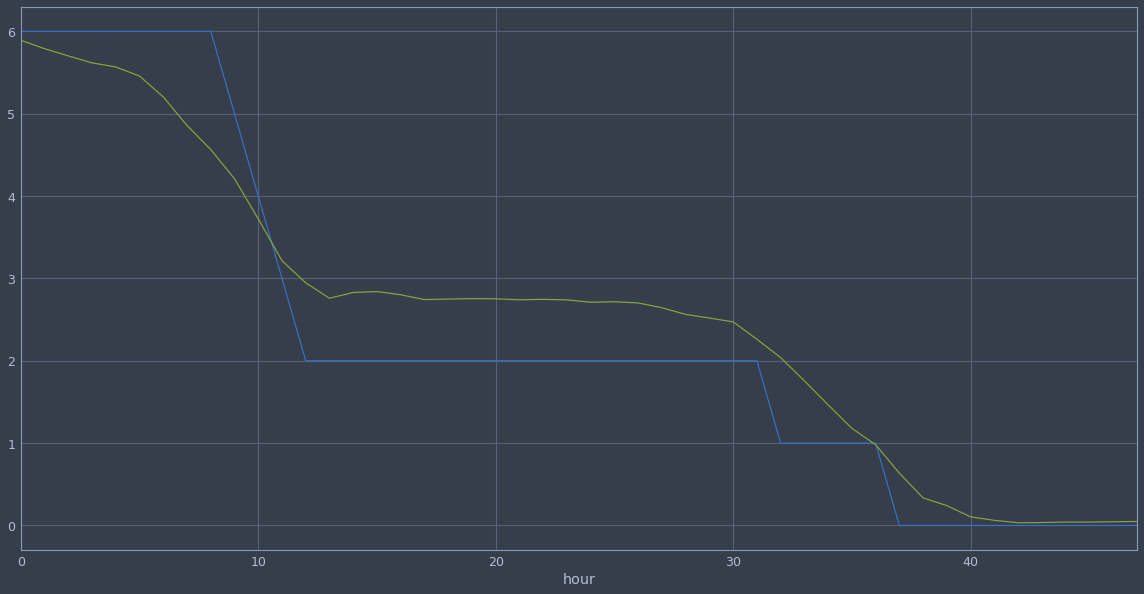

In [57]:
agg = pd.DataFrame(data).groupby('hour').target
agg.median().iloc[:48].plot()
agg.mean().iloc[:48].plot(figsize=(20,10))

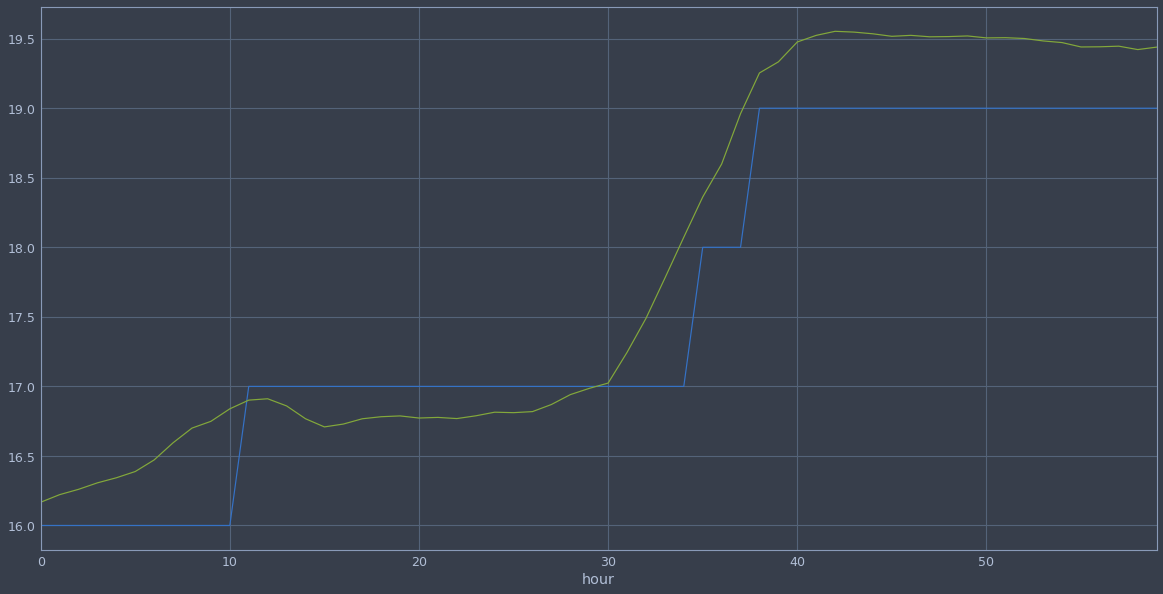

In [58]:
agg = pd.DataFrame(data).groupby('hour').water_temp
agg.median().iloc[:60].plot()
agg.mean().iloc[:60].plot(figsize=(20,10))

In [40]:
pd.DataFrame(data).to_hdf('./agg.hdf', 'key', complevel=7)